# frontloading based on Collins et al 2021

## 0. load libraries

In [2]:
library(tidyverse)
library(ggvenn)

## 1. read CSVs

### DEGs

In [3]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
deg_list <- lapply(files, read.csv)

# name list elements after the files
names(deg_list) <- gsub('DEG_','',tools::file_path_sans_ext(basename(files)))

# check things worked
names(deg_list)
head(deg_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,B1_B1_O01,B1_W5_O50,⋯,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48,pair,DEG_group
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LOC111134671,625.01171,1.753537,1.7854969,-3.896541,9.757625e-05,0.024809138,0.129437417,1630.363493,396.72563,⋯,343.310528,47.154920,18.39813,182.5864,1589.761857,113.04282,34.431967,365.533797,CC vs. BB,BB
2,LOC111120923,150.61422,-4.437657,4.2249639,3.936072,8.282599e-05,0.022257298,0.114534769,10.312823,5059.99177,⋯,184.094051,9.029665,0.00000,401.0569,185.203805,39.89747,5.379995,9.563384,CC vs. BB,CC
3,LOC111136853,88.45293,-1.689220,2.4561034,3.707079,2.096634e-04,0.041250020,0.227646483,2.812588,216.75736,⋯,3.731636,16.052739,0.00000,0.0000,6.902005,17.73221,2.151998,21.251965,CC vs. BB,CC
4,LOC111120760,106.14900,2.650952,0.8725114,-4.677419,2.905087e-06,0.001454877,0.006079963,62.814465,34.80049,⋯,31.096968,91.299951,198.69983,103.4305,81.673728,44.33052,40.887961,86.070458,CC vs. BB,BB
5,LOC111107221,5.76896,17.541870,4.0010929,-4.971174,6.654857e-07,0.000366605,0.001639387,0.000000,0.00000,⋯,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,CC vs. BB,BB
6,LOC111125595,126.64678,15.441532,9.9678950,-4.160631,3.173698e-05,0.011188080,0.039860365,493.140424,0.00000,⋯,0.000000,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000000,CC vs. BB,BB


### all genes

In [4]:
# get list of files
files_all <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/deseq_res_files/all_genes',
    pattern = '\\.csv$',
    full.names = TRUE
    )

# read each csv
all_list <- lapply(files_all, read.csv)

# name list elements after the files
names(all_list) <- tools::file_path_sans_ext(basename(files_all))

# check things worked
names(all_list)
head(all_list$bb_cc)

[1] "bb_cc" "bc_bb" "bc_cc" "bc_hc" "bc_wc" "bh_ch" "bh_hh" "bw_cw" "bw_ww"
[10] "cb_bb" "cb_bc" "cb_cc" "cb_ch" "cb_cw" "ch_cc" "ch_hc" "cw_cc" "cw_ch"
[19] "cw_wc" "hb_bb" "hb_bh" "hb_cb" "hc_cc" "hc_hh" "hh_cc" "hh_ch" "wb_bb"
[28] "wb_bw" "wb_cb" "wc_cc" "wc_hc" "wc_ww" "wh_hw" "ww_cc" "ww_cw"

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,svalue,B1_B1_O01,B1_W5_O50,⋯,W4_W5_G56,W5_B2_G21,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111116054,9.0629842,-0.0259479758,0.1402977,1.25567421,0.20923411,0.8319315,0.9732181,1.875059,5.965799,⋯,4.336105,2.452846,11.19491,2.006592,7.359253,5.277065,2.300668,21.05700,1.075999,0.0000
2,LOC111126949,539.2853993,0.0449490919,0.1165042,-1.33937885,0.18044737,0.8099303,0.9884593,829.713451,474.281013,⋯,230.897604,544.531781,506.25864,742.439160,650.373981,428.497663,480.839693,469.90350,302.355713,636.4963
3,LOC111110729,114.0070007,-0.0410675894,0.1029589,1.00110678,0.31677519,0.8906606,0.9913654,60.001877,92.469883,⋯,128.999131,62.138762,87.07151,149.491128,111.308701,121.372491,144.942108,119.69240,136.651870,226.3334
4,LOC111112434,6.9517032,0.0065767034,0.1296686,-0.41782612,0.67607425,0.9810808,0.9854003,10.312823,1.988600,⋯,6.504158,0.000000,13.68267,6.019777,3.679626,0.000000,2.300668,17.73221,8.607992,0.0000
5,LOC111120752,429.0263780,-0.0928699742,0.1371736,2.16428698,0.03044233,0.5232864,0.9843004,337.510556,334.084739,⋯,421.686235,286.165350,446.55246,346.137176,402.919100,293.404804,330.145914,461.03739,358.307660,456.9172
6,LOC111128944,0.1088474,0.0002295948,0.3710452,-0.01360725,0.98914332,NA,0.9712555,0.000000,0.000000,⋯,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000


## 2. identify overlap of DEGs

#### warming 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


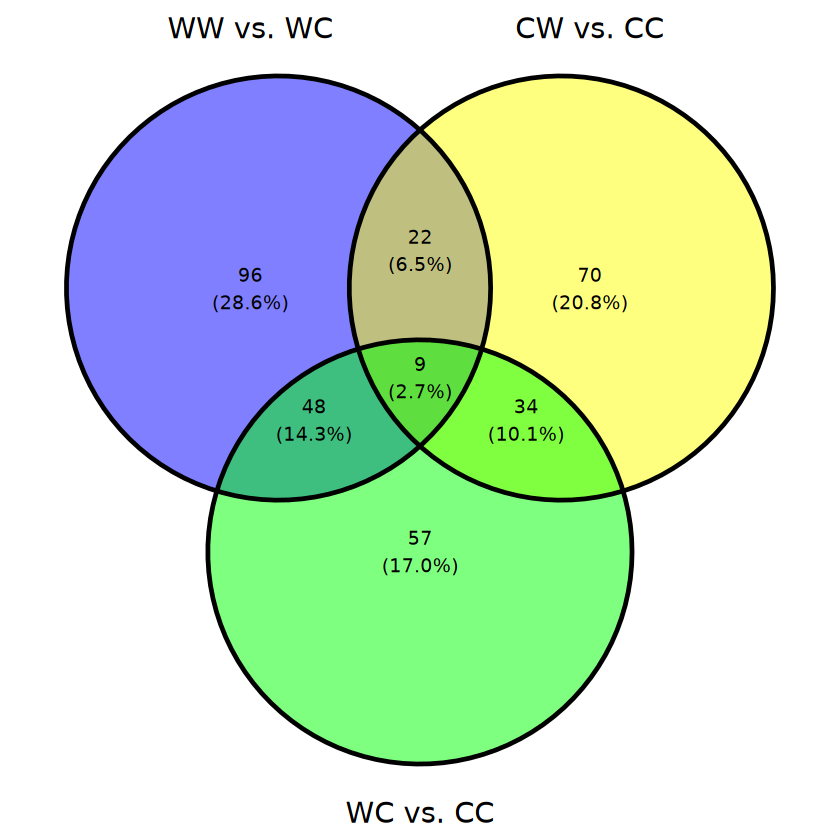

In [5]:
warm <- list(
    'WW vs. WC' = deg_list$wc_ww$Gene,
    'CW vs. CC' = deg_list$cw_cc$Gene,
    'WC vs. CC' = deg_list$wc_cc$Gene
    
)

# Plot
ggvenn(warm)

for frontloading analysis, would only want to look at the DEGs that are unique to WC vs. CC (57) and CW vs. CC (70) or the overlap between the two (34)

#### hypoxia

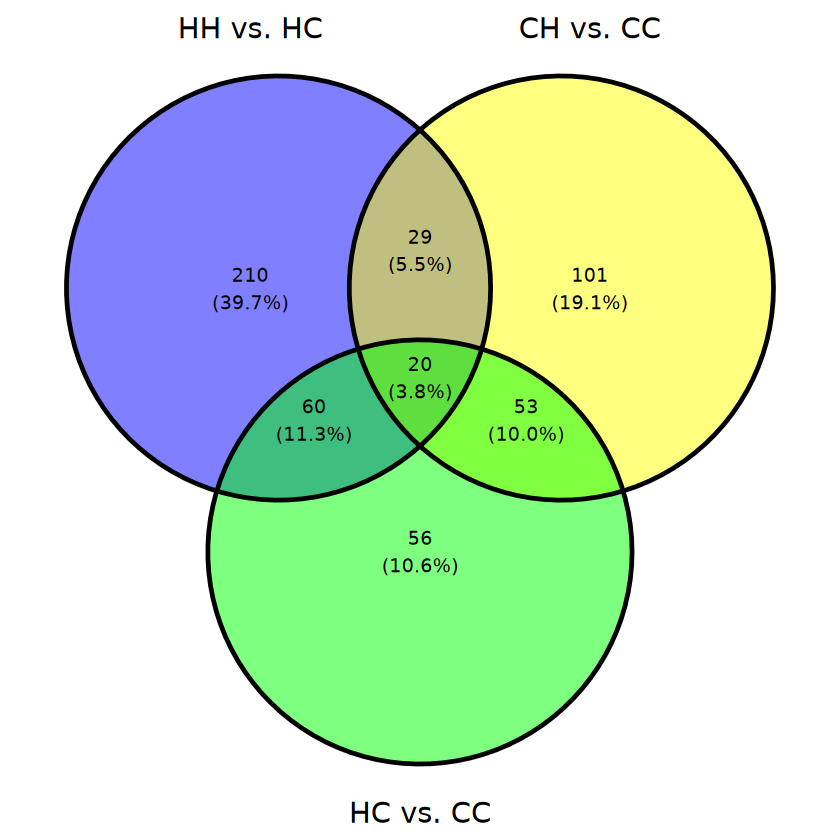

In [6]:
hypoxia <- list(
    'HH vs. HC' = deg_list$hc_hh$Gene,
    'CH vs. CC' = deg_list$ch_cc$Gene,
    'HC vs. CC' = deg_list$hc_cc$Gene
    
)

# Plot
ggvenn(hypoxia)

for frontloading analysis, would only want to look at the DEGs that are unique to HC vs. CC (56) and CH vs. CC (101) or the overlap between the two (53)

#### both

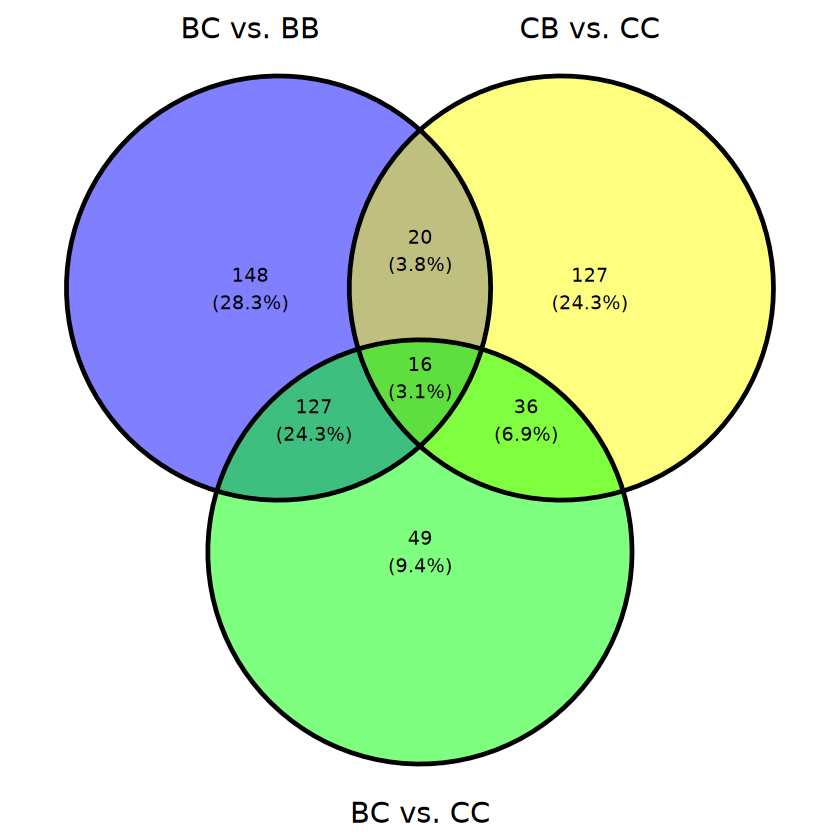

In [7]:
both <- list(
    'BC vs. BB' = deg_list$bc_bb$Gene,
    'CB vs. CC' = deg_list$cb_cc$Gene,
    'BC vs. CC' = deg_list$bc_cc$Gene
    
)

# Plot
ggvenn(both)

for frontloading analysis, would only want to look at the DEGs that are unique to BC vs. CC (49) and CB vs. CC (127) or the overlap between the two (36)

## 3. LFC in unique DEGs from CS vs. CC 
where S is a stressor (warm, hypoxic, or both)

#### warming

In [8]:
# pull out LFC of DEGs in CW vs. CC
cw_cc.deg <- deg_list$cw_cc %>%
select(Gene, log2FoldChange) %>%
rename(cw_cc = log2FoldChange)
dim(cw_cc.deg) # 162 total DEGs

# only unique DEGs 
cw_cc.uniq <- cw_cc.deg %>%
  dplyr::anti_join(deg_list$wc_ww, by = "Gene") # remove DEGs that are shared
dim(cw_cc.uniq) # 119 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
wc_ww.list <- all_list$wc_ww %>% 
dplyr::semi_join(cw_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(wc_ww = log2FoldChange)
dim(wc_ww.list) # 119 genes

# combine dfs for plotting
warm.df <- merge(cw_cc.uniq, wc_ww.list, by = 'Gene')
head(warm.df)

[1] 135   2

[1] 104   2

[1] 104   2

,Gene,cw_cc,wc_ww
,<chr>,<dbl>,<dbl>
1,LOC111099527,-7.787372,0.0065613601
2,LOC111099630,12.217288,-0.0034296757
3,LOC111099673,-29.341790,-0.0003876907
4,LOC111099767,1.745467,0.0011943448
5,LOC111099906,17.634121,0.0065468816
6,LOC111099940,-22.517854,-0.0001722351


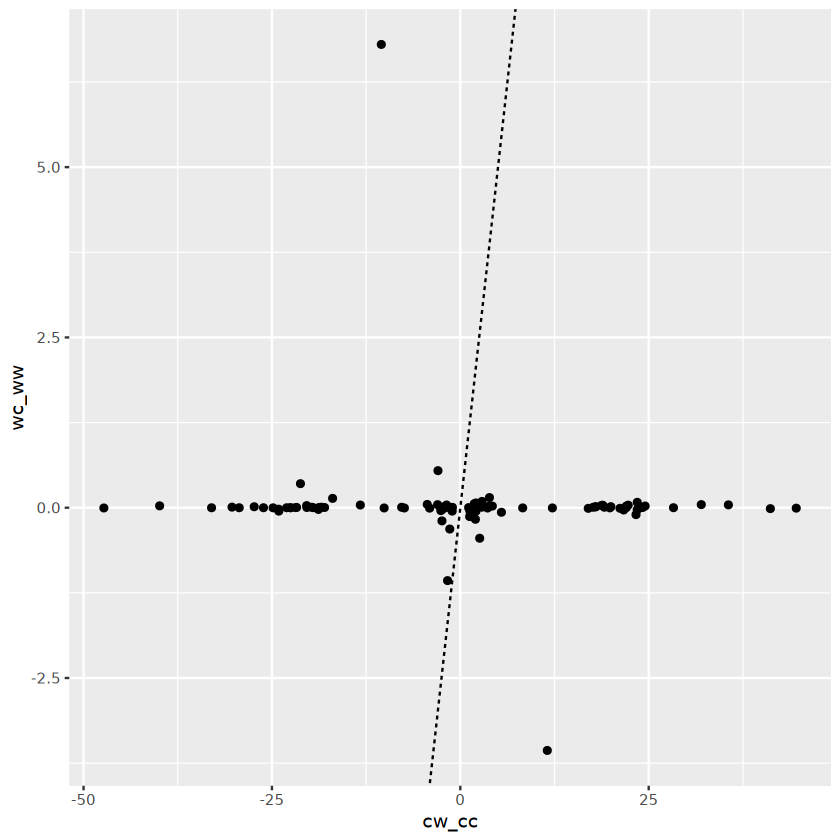

In [9]:
ggplot(warm.df, aes(x=cw_cc, y=wc_ww)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point()

here the genes DE in CW vs. CC have large LFCs, but have almost no difference in expression in WC vs. WW - so wicked reduced expression? at least a reduced sensitivity??

trying again but with DESeq results *without* lfcShrinkage

In [10]:
wc_ww <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/nolfcShrink_test/deseq_res/wc_ww.csv')
head(wc_ww)

cw_cc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase2_v_phase2/nolfcShrink_test/deseq_res/cw_cc.csv')

,X,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,B1_B1_O01,B1_W5_O50,⋯,W4_W5_G56,W5_B2_G21,W5_C4_G45,W5_H4_G46,W5_W2_G22,W6_B3_G35,W6_B4_G48,W6_H6_G71,W6_W3_G36,W6_W4_G48
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,LOC111116054,8.9537018,1.65836585,0.7743342,0.8502347,0.3951946,1,1.866636,5.925652,⋯,4.308183,2.436697,11.10840,1.994767,7.317628,5.245991,2.287545,20.92789,1.068844,0.0000
2,2,LOC111126949,558.9188428,-0.06910985,0.4001665,0.0000000,1.0000000,1,825.986574,471.089320,⋯,229.410737,540.946738,502.34665,738.063823,646.695362,425.974455,478.096882,467.02232,300.345215,632.2158
3,3,LOC111110729,112.7023690,-0.36044702,0.2464044,0.0000000,1.0000000,1,59.732362,91.847603,⋯,128.168440,61.729658,86.39869,148.610148,110.679121,120.657789,144.115328,118.95851,135.743211,224.8113
4,4,LOC111112434,7.0206931,0.76201572,1.0785591,0.0000000,1.0000000,1,10.266500,1.975217,⋯,6.462274,0.000000,13.57694,5.984301,3.658814,0.000000,2.287545,17.62348,8.550753,0.0000
5,5,LOC111120752,427.4811709,-0.03722888,0.2854820,0.0000000,1.0000000,1,335.994538,331.836502,⋯,418.970782,284.281319,443.10184,344.097323,400.640125,291.677090,328.262692,458.21058,355.925113,453.8444
6,6,LOC111128944,0.1058866,-1.92151839,8.2324434,-0.1119374,0.9108730,1,0.000000,0.000000,⋯,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000


In [11]:
# pull out LFC of DEGs in CW vs. CC
cw_cc.deg <- cw_cc %>%
filter(log2FoldChange > 1 | log2FoldChange < -1) %>%
filter(padj <= 0.05) %>%
select(Gene, log2FoldChange) %>%
rename(cw_cc = log2FoldChange)
dim(cw_cc.deg) # 109 total DEGs

wc_ww.deg <- wc_ww %>%
filter(log2FoldChange > 1 | log2FoldChange < -1) %>%
filter(padj <= 0.05) %>%
select(Gene, log2FoldChange) %>%
rename(wc_ww = log2FoldChange)
dim(wc_ww.deg) # 144 total DEGs

# only unique DEGs 
cw_cc.uniq <- cw_cc.deg %>%
  dplyr::anti_join(wc_ww.deg, by = "Gene") # remove DEGs that are shared
dim(cw_cc.uniq) # 75 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
wc_ww.list <- wc_ww %>% 
dplyr::semi_join(cw_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(wc_ww = log2FoldChange)
dim(wc_ww.list) # 75 genes

# combine dfs for plotting
warm.df <- merge(cw_cc.uniq, wc_ww.list, by = 'Gene')
head(warm.df)

[1] 109   2

[1] 144   2

[1] 75  2

[1] 75  2

,Gene,cw_cc,wc_ww
,<chr>,<dbl>,<dbl>
1,LOC111099630,18.61728,-1.12492946
2,LOC111099673,-36.55553,-0.14730090
3,LOC111099906,18.57293,1.54456876
4,LOC111099940,-22.69116,-0.04186661
5,LOC111101368,25.69979,5.27018746
6,LOC111101587,-19.82160,0.55707365


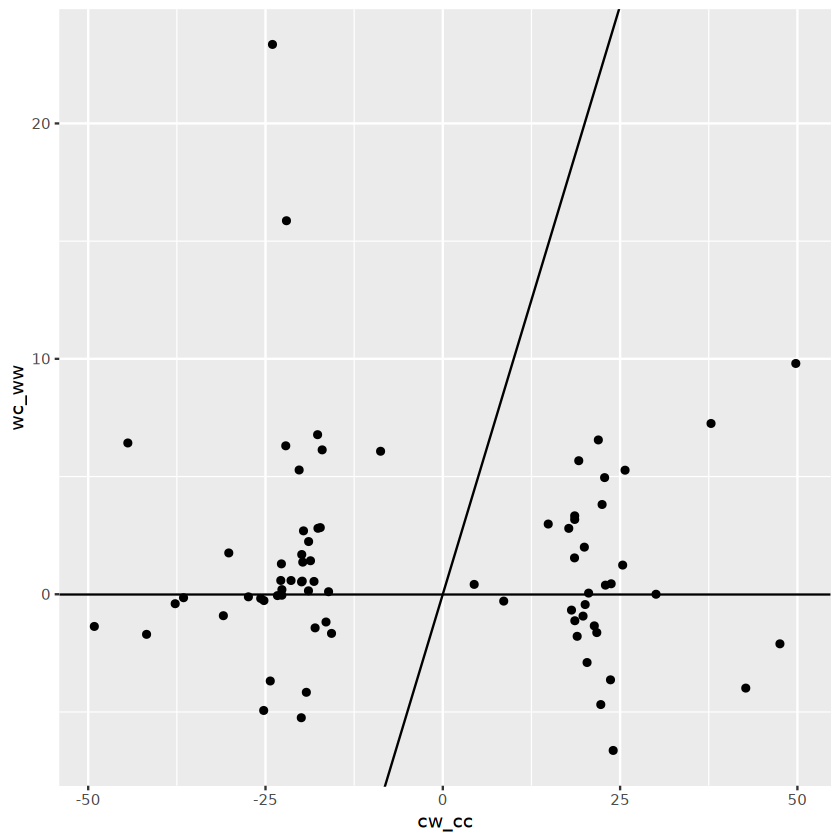

In [41]:
ggplot(warm.df, aes(x=cw_cc, y=wc_ww)) + 
geom_abline(intercept = 0, slope = 1) +
geom_hline(yintercept = 0) +
geom_point()

hmmmmm okay so this looks much closer to those other papers (Collins 2021, Gurr 2022, Barshis 2012) 

clearly have two groups - those that are downregulated in CW vs. CC (left) and those upregulated in CW vs. CC (right)

of the downregulated DEGs in CW vs. CC, you see most have a reduced reaction in WC vs. WW (not *as* downregulated) or actually are upregulated in WC vs. WW

of the upregulated DEGs in CW vs. CC< you see most have a reduced reaction in WC vs. WW (beneath the 1:1 line for upregulation) and then some that are actually downregulated 

#### hypoxia

In [12]:
# pull out LFC of DEGs in CH vs. CC
ch_cc.deg <- deg_list$ch_cc %>%
select(Gene, log2FoldChange) %>%
rename(ch_cc = log2FoldChange)
dim(ch_cc.deg) # 227 total DEGs

# only unique DEGs 
ch_cc.uniq <- ch_cc.deg %>%
  dplyr::anti_join(deg_list$hc_hh, by = "Gene") # remove DEGs that are shared
dim(ch_cc.uniq) # 177 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
hc_hh.list <- all_list$hc_hh %>%
dplyr::semi_join(ch_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(hc_hh = log2FoldChange)
dim(hc_hh.list) # 177 genes

# combine dfs for plotting
hyp.df <- merge(ch_cc.uniq, hc_hh.list, by = 'Gene')
head(hyp.df)

[1] 203   2

[1] 154   2

[1] 154   2

,Gene,ch_cc,hc_hh
,<chr>,<dbl>,<dbl>
1,LOC111099482,-5.893969,-0.096861814
2,LOC111099607,12.828767,-0.080518835
3,LOC111099630,19.963535,4.671037607
4,LOC111099906,17.852200,0.021234410
5,LOC111100493,17.005458,-0.009576018
6,LOC111101171,-17.629327,0.106184408


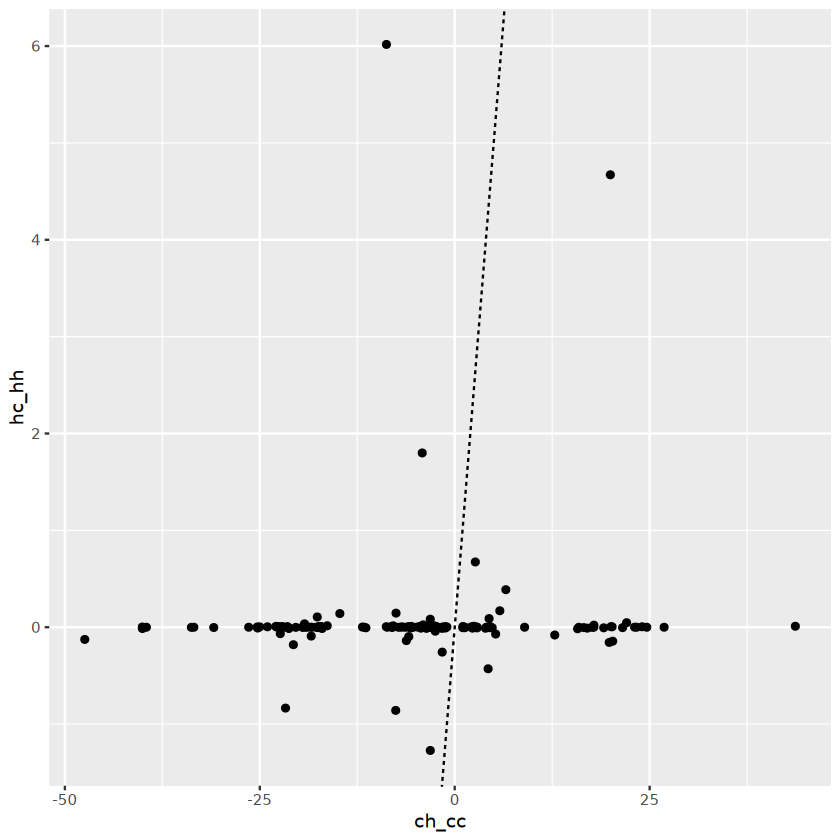

In [13]:
ggplot(hyp.df, aes(x=ch_cc, y=hc_hh)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point()

ah okay so - DEGs in CH vs. CC have HUGE LFCs, whereas the same genes in HC vs. HH have much smaller LFCs - they're almost not even comparable?? 

#### both

In [14]:
# pull out LFC of DEGs in CB vs. CC
cb_cc.deg <- deg_list$cb_cc %>%
select(Gene, log2FoldChange) %>%
rename(cb_cc = log2FoldChange)
dim(cb_cc.deg) # 217 total DEGs

# only unique DEGs 
cb_cc.uniq <- cb_cc.deg %>%
  dplyr::anti_join(deg_list$bc_bb, by = "Gene") # remove DEGs that are shared
dim(cb_cc.uniq) # 190 unique genes

# pull out the unique DEGs in the HC vs. HH comparison
bc_bb.list <- all_list$bc_bb %>%
dplyr::semi_join(cb_cc.uniq, by = "Gene") %>%
select(Gene, log2FoldChange) %>%
rename(bc_bb = log2FoldChange)
dim(bc_bb.list) # 190 genes

# combine dfs for plotting
both.df <- merge(cb_cc.uniq, bc_bb.list, by = 'Gene')
head(both.df)

[1] 199   2

[1] 163   2

[1] 163   2

,Gene,cb_cc,bc_bb
,<chr>,<dbl>,<dbl>
1,LOC111099607,17.067249,-0.0062672711
2,LOC111099630,7.105796,-0.0010917227
3,LOC111099705,3.183373,-0.0011144163
4,LOC111099726,-1.375947,0.0111277024
5,LOC111099858,-21.520405,0.0023079914
6,LOC111099906,13.343342,0.0009463613


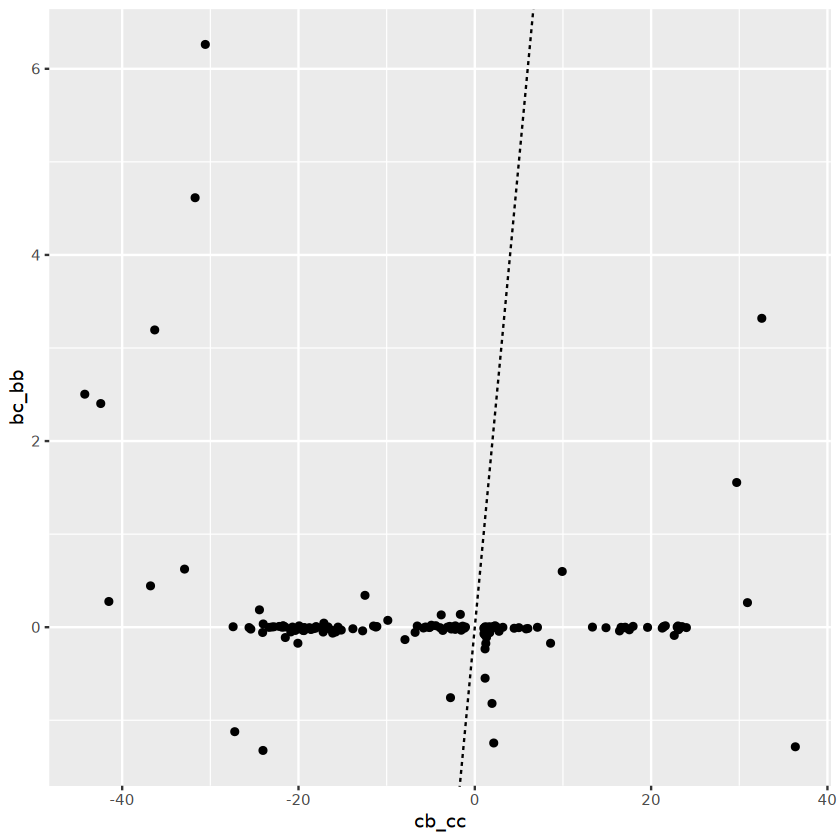

In [15]:
ggplot(both.df, aes(x=cb_cc, y=bc_bb)) + 
geom_abline(intercept = 0, slope = 1, linetype = "dashed") +
geom_point()

more 'movement' here - the DEGs in CB vs. CC tend to be upregulated in BC vs. BB (above 0 on the yaxis)